# <center> Deep Learning for Audio Signal Processing, with Python and Pytorch Examples<br>
## <center> Tutorial for the AES Convention, October 2021
#### <center> Gerald Schuller, Ilmenau University of Technology and Fraunhofer IDMT, Germany <br>Renato de C. R. Profeta, Ilmenau University of Technology<br>Sascha Spors, Universität Rostock, Germany


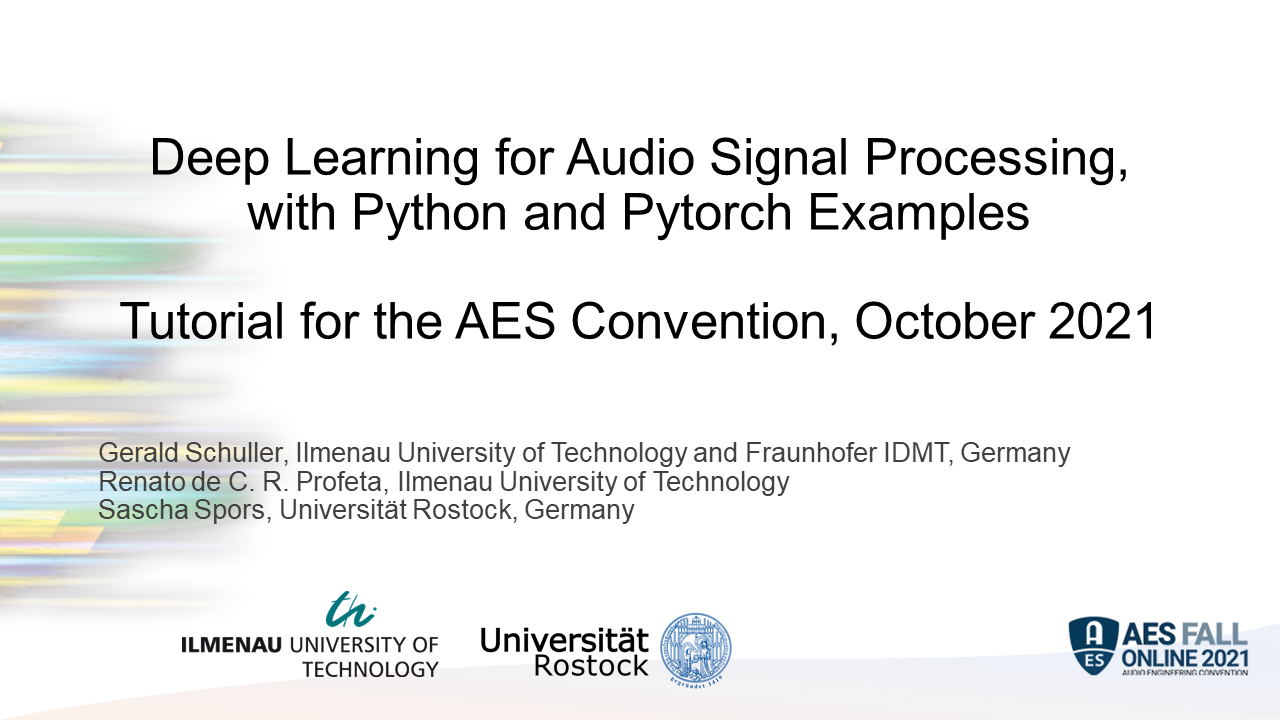

## Content

 - Introduction into machine learning for audio
 - Best practices
 - Convolutional layers as filter, predictor, classifier
 - Autoencoders as filter bank with optimization 
 - Variational autoencoders as audio coder with quantization 
 - Recurrent Neural Networks as Infinite Impulse Response filters
 - Conclusions
 
 Material for a good part from our project workshop: 
 
 https://wwwalt.tu-ilmenau.de/en/institute-for-media-technology/lectures/lehre-fuer-bachelor-mt/praxiswerkstatt-machine-learning-fuer-audio-signale-in-python/


## Machine Learning

<img src="https://i.stack.imgur.com/FyHLS.png" width="400">

* study of computer algorithms that can improve automatically through experience and by the use of data [[Wikipedia]](https://en.wikipedia.org/wiki/Machine_learning)
* build models from examples that generalize a prediction/decision against a
performance measure
* interdisciplinary field: computer science, statistics, mathematics and engineering









## Applications for Data-Driven Techniques in Audio

* Audio Classification
* Audio Separation and Segmentation
* Music Genre Classification and Tagging
* Music Generation and Music Transcription
* Voice Recognition
* Speech to Text and Text to Speech
* ...

## Data Science Venn Diagram

<img src="https://images.squarespace-cdn.com/content/v1/5150aec6e4b0e340ec52710a/1364352051365-HZAS3CLBF7ABLE3F5OBY/Data_Science_VD.png?format=1500w">

* machine learning requires math and statistics knowledge, as well as *‘hacking‘* skills
* signals as data → additionally profound background in (discrete) signals and systems


## Classification of Learning Tasks

#### Supervised Learning
* inputs and observed outputs (e.g. labels) are available
* learns mapping between input and output from examples
* applications: predict output for unseen input

#### Unsupervised Learning
* only inputs are known
* self-discovers occurring patterns in the examples
* applications: clustering, anomaly detection, ...

#### Reinforcement Learning
* concerned with how agents ought to take actions in an environment so as to maximise some reward

## The Four Pillars of Machine Learning

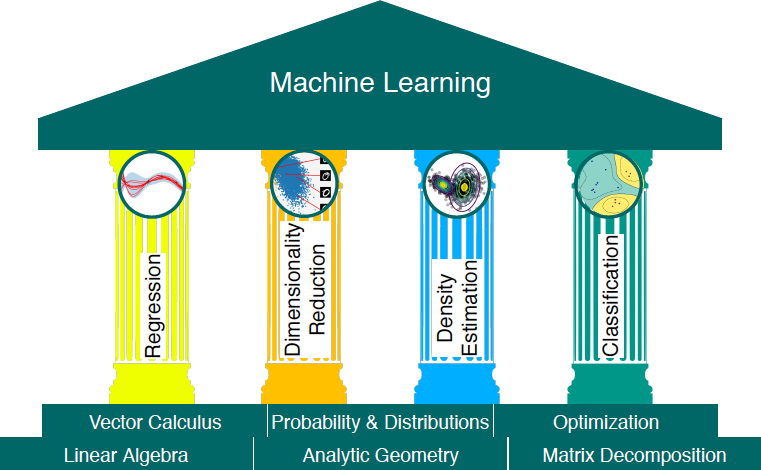

from [M. P. Deisenroth, et al., Mathemathics for machine learning. Cambridge University Press, 2020]

## Structured Development of Data-Driven Methods

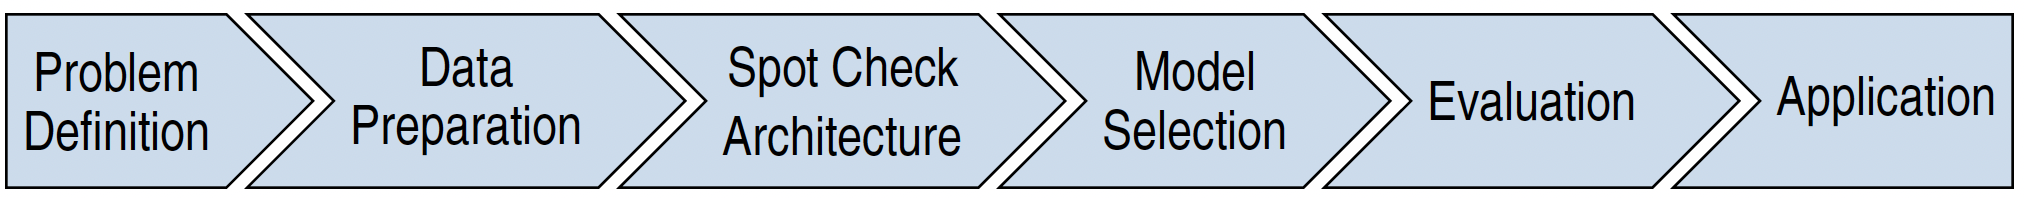

1. Definition of problem and performance measures
2. Data preparation and feature extraction
3. Spot check potential model architectures
4. Model selection
5. Evaluation and reporting
6. Application

## Problem Definition

* Brief informal description using 1-3 sentences
* Formal definition:
    1. What is the task to be solved?
    2. What experience (data) is required?
    3. What performance measure(s) are used?
* Collect assumptions about the problem and it's phrasing
* Identify similar problems and inspect their solutions


#### Solution strategy
* How to check and prepare the data?
* Which model/model architecture might address the problem?


## Pre-Processing of Audio Signals

* signals needs to carry task-specific information (experience)
* capturing signals is a complex and error-prone task
* checks for signal quality are very important
* no standard procedure for signal quality evaluation → be creative

## Evaluation of Signal Quality – Capturing

### Continuous signal
* (non-linear) distortions?
* SNR of continuous signal?
* glitches, artefacts in signal?

### Sampling and quantization
* expected bandwidth of signal → sufficient sampling rate?
* desired SNR of quantized signal → sufficient word-length of quantizer?
* signal well levelled before quantization (e.g. too low, clipped)?
* variations in sampling time-instants (e.g. jitter)?

## Evaluation of Signal Quality – Analysis Techniques

* plotting of single/multiple signals
* plotting of magnitude (/phase) spectrum of single/multiple signals
* computation and plotting of spectrogram
* statistical properties of a population of signals/spectra
(mean, median, confidence intervals, outliers, ...)
* estimate probability density function (PDF) of signal/noise
→level, PSD, correlations, ...
* estimate cross-correlation function (CCF) between signal and noise
* ...

## Pre-Processing of Audio Signals

* scaling
* truncation/zero-padding
* resampling/interpolation
* denoising (e.g. filtering)
* signal specific measures
* segmentation
* ...

## Segmentation of Signals

Splitting of (infinitely) long signal $x[k]$ into segments $x_n[k]$ of length $F$

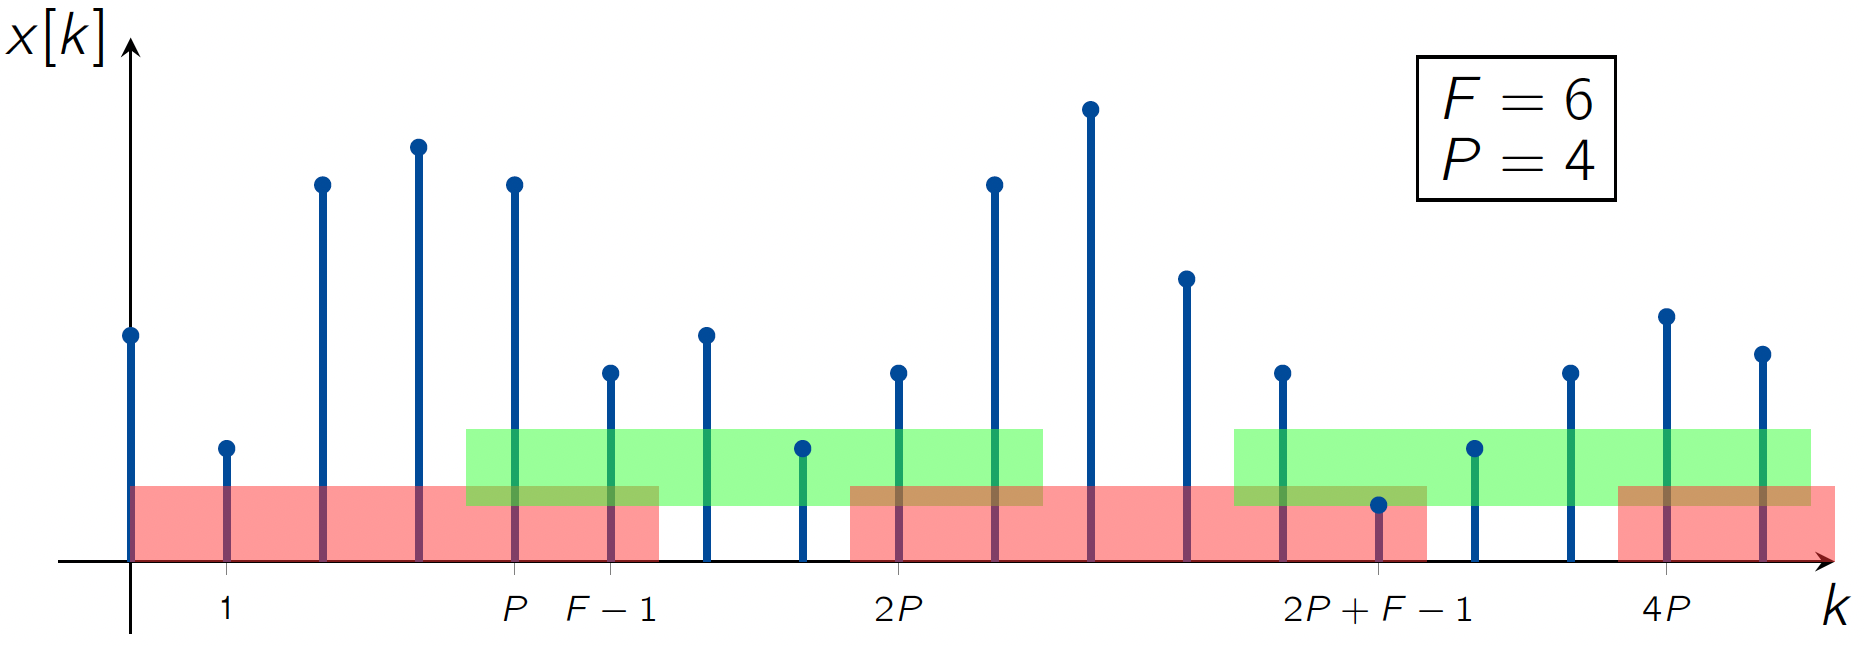

with hop size $P$
* $0 < P < F$ : overlap of $F − P$ samples
* $P ≥ F$ : no overlap between segments

# Connection between Audio Signal Processing and Deep Learning
* In many ways neural networks can be seen as non-linear extension of linear signal processing
* A main obstacle are different terms for the same concepts on both fields and communities


## Terminology Signal Processing <-> Deep Learning
* Optimization = Training
* Objective function, error function = loss function
* Sampling = stride
* Upsampling of impulse response = Dilation



* Desired output = target
* A signal from a set of signals = sample (in the sense of "example")
* To differentiate, a signal processing sample will be called "signal sample" here
* coefficients = weights

## Filtering in Audio Signal Processing
* A common tool for audio signal processing: filtering
* Usually linear and time-invariant
* Examples: lowpass filters for sampling rate changes, 
* adaptive filters or predictors for denoising 

## The Filtering Operation
* Filtering is mathematically a convolution
* Which can also be seen as a correlation of the signal to filter with the time-reversed filter impulse response
* Observe: The length of the output of the filter depends on if and how many zeros we append before and after the input signal ('padding')

## Sampling Rate Changes
* After a lowpass filtering for a reduced bandwidth we often reduce the sampling rate (downsampling)
* After increasing the sampling rate (upsampling) we often apply lowpass filtering to suppress spectral copies (aliasing) 
* In deep learning this is called "stride"
* Deep learning also has "dilation", which is an upsampling factor for the impulse response.

## Pytorch 1-Dimensional Convolution "Conv1d"
* *torch.nn.Conv1d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, bias=True)*
* This corresponds to filtering with downsampling and padding, as can be used for audio.
* It can have *in_channels* input audio channels, and *out_channels* output channels



* Between each input channel and output channel it provides a filter with downsampling, 
* with optional bias for each output channel.
* For training and testing the signals can consist of "batches", each to fit into memory for training or testing.


## Converting an Audio Signal as Pytorch Input
* Take a 1-dimensional mono numpy audio signal, add the batch and channels dimensions
* Conv1d uses signal dimensions of shape (batch, channels, signal)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
def format_vector2pytorch(vector):
    #Function to convert a vector, like a mono audio signal, into a 3-d Tensor X that Pytorch expects
    #Tensor X with shape (batch, channels, signal):
    X = np.expand_dims(vector, axis=0)  #add channels dimension (here only 1 channel)
    X = np.expand_dims(X, axis=0)  #add batch dimension (here only 1 batch)
    X=torch.from_numpy(X)
    X=X.type(torch.Tensor) #convert it to type torch.Tensor, torch has several types
    return X

## Generating an Example Audio Signal
* Using "espeak" allows us to conveniently generat speech examples.
* It is a text-to-speech system, with a nicely robotic sound.
* But instead we could also use other audio examples
* Another convenient examples are speech commands in Pytorch:
* https://pytorch.org/audio/stable/datasets.html#speechcommands


In [ ]:
!apt install espeak > Null
from IPython.display import Audio
import scipy.io.wavfile as wav
import os
import matplotlib.pyplot as plt

#Generating a test speech file using text-to-speech:
os.system('espeak -s 100 "hello, this is a test speech" -w espeakwav.wav')
#At 16 bit/sample and 22050 Hz sampling rate.

0

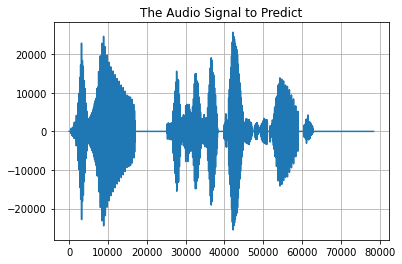

In [ ]:
fs , audio = wav.read('espeakwav.wav')
#audio = audio+ np.random.normal(scale=100, size=audio.shape) #add noise 
plt.figure()
plt.plot(audio)
plt.title("The Audio Signal to Predict")
plt.grid()
display(Audio(audio, rate=fs)); #

# Example: Audio Predictor
* In speech and audio coding predictors are used for low delay compression
* It works by predicting the next audio sample based on the past samples
* The predictor is a filter 
* whose coefficients are computed to minimize the mean squared prediction error
* This is an optimization problem, or a "training" task in terms of deep learning
* The "target" is simply the next sample in the future.

## A Convolutional Layer as Predictor
* The following shows a Pytorch Conv1d convolutional layer with 1 input channel and 1 output channel
* This can be used as a predictor
* padding = filter length - 1 means it starts predicting from the first sample.
* It pads correspondingly zeros before the start of the signal
* Dialation is not used (=1), also no bias and non non-linearity.

In [ ]:
L=12 #filter length
dilation=1 #Dilation: upsampling the filter impulse response, new filter length: (L-1)*dilation+1
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # Define the model. 
        self.layer1=nn.Sequential(nn.Conv1d(in_channels=1, out_channels=1, kernel_size=L, stride=1, 
                                            dilation=dilation, padding=dilation*(L-1), bias=False))
        #https://pytorch.org/docs/stable/nn.html#conv1d  
        # Generate a convolutional neural network model, 1 layer, no bias, linear activation function 
        # returns: Trainable object
    def forward(self, x):
        out = self.layer1(x)
        return out

## Input and Target
* Next we need to create the input and the desired output (the target)
* Input is our audio (speech) signal, 
* target is the same signal, but shifted 1 signal sample into the future
* Observe: For computing the loss function, the output of the network and the target should have **exactly the same length**.

In [ ]:
X=format_vector2pytorch(audio[:-((L-1)*dilation+1)])      #Input, remove last samples, to make output the same length as input. 
Y=format_vector2pytorch(audio[1:]) #Target, remove first sample, for the signal to predict, 1 sample in the future
    

## Setting up the Network
* Next we need to set up an instance of network, 
* define the loss function,
* and the chosen optimizer.


In [ ]:
print("Generate Model:")
predictor = ConvNet()#.to('cpu')
print("Def. loss function:")
#loss_fn = nn.MSELoss(reduction='sum')
loss_fn = nn.MSELoss(reduction='mean')
learning_rate = 1e-2 #, optional
optimizer = torch.optim.Adam(predictor.parameters(), lr=learning_rate)

Generate Model:
Def. loss function:


## Run the Optimization or Training
* Now we have defined everything we need, and can run the optimzation loop

In [ ]:
for epoch in range(2000):
    Ypred=predictor(X) #prediction, should be close to the target Ypred
    loss=loss_fn(Ypred, Y) #loss function, how close are we?
    if epoch%100==0:  #show progress
        print(epoch, loss.item())
    optimizer.zero_grad() #initialize for next gradient calculation
    loss.backward() #do backpropagation of loss
    optimizer.step() #take optimizer update step

0 5590653.5
100 1218057.375
200 1011668.1875
300 899177.5
400 829510.0625
500 783702.3125
600 751588.4375
700 728003.4375
800 710130.75
900 696250.875
1000 685268.25
1100 676491.5625
1200 669480.5625
1300 663932.75
1400 659612.75
1500 656316.5
1600 653858.3125
1700 652069.75
1800 650801.5625
1900 649926.1875


## Testing
* Now we have a trained network, which we can test and apply
* Usually the testing should be done on a "validation set", or a "test set", which is different from the "training set" used for the training.
* The "validation set" is usually used for tuning the hyper parameters, which here could be the filter length.
* The "test set" is then used for the final testing.
* For simplicity here we take the trainigs signal also for testing.

In [ ]:
#audio = audio+ np.random.normal(scale=1000, size=audio.shape) #add noise 
#display(Audio(pred, rate=fs)); #The noisy audio
X=format_vector2pytorch(audio[:-((L-1)*dilation+1)])  
Ypred=predictor(X) # Make Predictions using the trained predictor
print("Loss value=", loss_fn(Ypred, Y).item())


Loss value= 649338.6875


## Plotting the Pytorch Signals
* The output of our network is a Pytorch tensor
* Before we can plot it with pyplot, we need to convert it to numpy type. 
* For that, we need to: 
*remove the gradient using "detach", 
*convert it to the numpy type, 
*and remove the non used dimensions (batch and channels).

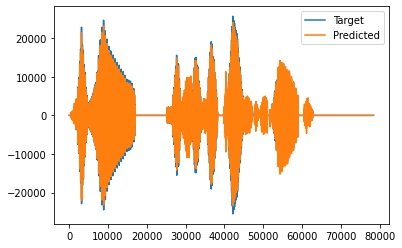

In [ ]:
import matplotlib.pyplot as plt
pred=Ypred.detach().numpy()[0,0,:] #convert to numpy type
target=Y.detach().numpy()[0,0,:]
plt.plot(target)
plt.plot(pred)
plt.legend(('Target','Predicted'))
plt.show()


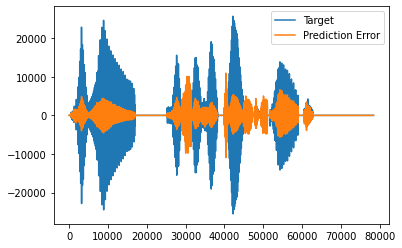

In [ ]:
plt.plot(target)
plt.plot(pred-target)
plt.legend(('Target', 'Prediction Error'))
plt.show()

## Reading the weights
* we can also read the trained weights, using "state_dict()"
* They correspond to the time reversed impulse response of our prediction filter.

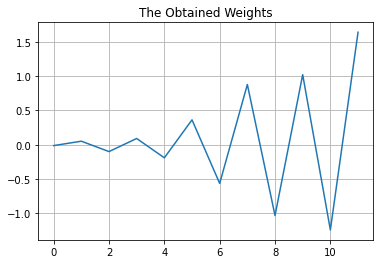

In [ ]:
ww = predictor.state_dict()   #read obtained weights
#weight format for Conv1d:
#[0: filter weights, 1: bias for first layer]
#weight: filters of shape: out_channels× in_channelsgroups× kW
#Weights for layer 1  between channel 0 out and channel 0 in:
weights=ww['layer1.0.weight'][0,0,:]

plt.plot(np.array(weights))
plt.title('The Obtained Weights')
plt.grid()
plt.show()

* Observe: If we flip the coefficients to obtain the impulse response, it has similarity to a minimum phase filter, whose largest coefficients come in the beginning.
* This leads to the lowest delay (here the delay should be -1 signal sample)

In [ ]:
display(Audio(pred, rate=fs)); #The predicted audio
display(Audio(pred-target, rate=fs)); #The prediction error

* Observe: The prediction error contains the more difficult to predict signal parts, like high frequencies and noise.

# Example: An Audio Recognizer or Classifier
* Goal: Recognize a spoken key word or an instrument or sound
* As example we take again espeak, 
* for recognizing the spoken numbers "one" and "two".

## Pre-Processing
* To mimic the recognition performance of the human ear, often "Mel-Frequency Ceptral Coefficients" (MFCC) are computed, which mimic cochlea processing
* It is a kind of spectrogram
* We use the corresponding function of the Python "librosa" module,
* *librosa.feature.mfcc*
* For a 1-dimensional audio input it produces a 2-dimensional output, the "melspectrogram".

## The Network
* To make the recognition more **robust against shifts** in time and frequency, first is a **convolutional layer**.
* Since its output still contains more information than needed, it is followed by a *MaxPool2d* layer.
* This can be seen as downsampling in 2-d, but instead of on a regular grid, it keeps the maximum within its *kernel_size*.


* Next is a *dropout* layer. It randomly drops a slected fraction of weights during training
* This avoids the network focusing to much on individual features and to look more at the "big picture"
* Hence it avoids overfitting and helps generalization to previously unseen inputs.


* The next layers are *Linear* layers
* They consist of a multiplication with a matrix of weights and an addition of a *bias* weight.
* As input it expects a 1-d vector
* The signal representation is still 2-d, hence first it needs to be "flattened", or rearanged to a 1-d vector, using *view*.

* Between the layers is a non-linear "activation" function
* Here simply a *leaky_relu* function
* LeakyReLU(x)=max(0,x)+negative_slope∗min(0,x)
* This acts like an input controlled soft-switch or activation.

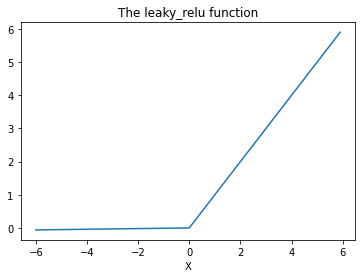

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
x=torch.arange(start=-6, end=6, step=0.1)
y=F.leaky_relu(x)
plt.plot(x.numpy(), y.numpy())
plt.xlabel('X')
plt.title('The leaky_relu function')
plt.show()

## The Network Output
* It turns out that the network is best to train if it has an output (or a "node") for each class to detect.
* Our example has two classes ("one" and "two"),
* hence we need 2 outputs.
* The output with the largest value "wins", its class is detected (via argmax).


## The "Deep" Recognizer Network in Pytorch
It consists of:
* A 2D Convolutional layer
* A MaxPool2d layer
* 3 fully connectd Linear layers


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

audiolen= 0.9*22050 #set the desired audio recording length in audio samples, 
#here 0.9 second at 22050 samples per second.
mfcclen=int(np.ceil(audiolen/512)) #compute the resulting mfcc length, here 39
print("mfcclen=", mfcclen)

# Creating the neural network
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv = nn.Conv2d(in_channels=1, out_channels=512, kernel_size=16)  
        self.pool = nn.MaxPool2d(kernel_size=8)
        self.dropout = nn.Dropout(p=0.25)
        in_features=int(512*2*np.floor((mfcclen-16+1)/8)) #;print("in_features=", in_features)#3072
        self.fc1 = nn.Linear(in_features=in_features, out_features=1024) 
        
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(in_features=256, out_features= 2) #last out_features= number of classes

    def forward(self, x): #default function
        x = F.leaky_relu(self.conv(x)) #; print("x.shape=", x.shape)# (4, 512, 17, mfcclen-16+1) 
        x = self.pool(x) #;print("xpool.shape=", x.shape) # (4, 512, 2, floor((mfcclen-16+1)/8))
        x = self.dropout(x)
        x = x.view(x.size(0),-1) #; print("xflatten.shape=", x.shape)
        x = F.leaky_relu(self.fc1(x))
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def predict(self, x):
        output = self(x)
        return torch.argmax(output).item() #returns value of argmax of classes

mfcclen= 39


## The Training Set
* Next we need a training set
* It should cover all expected variations of the input
* The different classes should have a similar amount of training samples
* In the following example we just use two training example (male and female speech) for each class, for simplicity.
* We use synthetically produced samples (espeak)
* In practice this can also be used to enhance for missing trainig material

In [ ]:
import os
import scipy.io.wavfile as wav
import librosa #for MFCC's

#Make training set: (can also be replaced by other recordings)
os.system('espeak -s 150 -ven-us+f5 "1" -w espeakf1.wav') #female speech
os.system('espeak -s 150 "1" -w espeakm1.wav') #male speech
os.system('espeak -s 150 -ven-us+f5 "2" -w espeakf2.wav')
os.system('espeak -s 150 "2" -w espeakm2.wav')
audioset=('espeakf1.wav','espeakm1.wav','espeakf2.wav','espeakm2.wav')
#At 16 bit/sample and 22050 Hz sampling rate.
print("len(audioset)=",len(audioset))

#Pre-processing before reconition:
x=np.zeros((len(audioset),32,mfcclen))
batch=0
for audio in audioset:
  print("audio=", audio)
  fs , audio = wav.read(audio) #;print("audio.shape=", audio.shape)
  mfcc = librosa.feature.mfcc(audio.astype(float), sr=fs, hop_length=512, n_mfcc=32) ; 
  #print("mfcc.shape=", mfcc.shape) #(32, ceil(len(audio)/512))
  x[batch,:,:min(mfcc.shape[1],mfcclen)]=mfcc[:,:min(mfcc.shape[1],mfcclen)] 
  batch +=1
  
#Conversion: pytorch Conv2D expects input shape of  input size (N, C_in, H, W), 
#or: Batch, in channels, Height, Width
x= np.expand_dims(x, axis=1) #add channels dimension (1 channel)
X=torch.from_numpy(x)
X=X.type(torch.Tensor) #torch has different tensor types

len(audioset)= 4
audio= espeakf1.wav
audio= espeakm1.wav
audio= espeakf2.wav
audio= espeakm2.wav


In [ ]:
from IPython.display import Audio
display(Audio('espeakf1.wav', rate=fs)); #A sample of the training set


## The Target
* The target is the desired output for the training set.
* The target need to fit in size to the neural network output with the chosen loss function
* A popular loss function for classification is the "CrossEntropyLoss()"
* It compares the class outputs with the index of the correct class.
* In training it leads to the output for the correct class to become maximum.

In [ ]:
print("Input X.shape=", X.shape, " (batch, in_Channels, in_length (w,h))")
recognizer=Net() #instantiation
out=recognizer(X) #Output before training
print("Network out.shape=", out.shape, "out.shape= (batch, classes)") 
#random output before training. The network correcponds to detectors of classes, 
#first class means "one detected", second class means "two detected".

#A popular loss function for classification is the "CrossEntropyLoss()" 
#it compares the class outputs with the index of the correct class.
#In training it leads to the output for the correct class to become maximum
loss_fn = nn.CrossEntropyLoss() 

#Target, the desired output:
target=torch.LongTensor([0,0,1,1]) #class0: "one", class 1: "two"
print("target=", target)

Input X.shape= torch.Size([4, 1, 32, 39])  (batch, in_Channels, in_length (w,h))
Network out.shape= torch.Size([4, 2]) out.shape= (batch, classes)
target= tensor([0, 0, 1, 1])


## Training
* Now the network can be trained such that the output approaches the target
* To let the trained network run on e.g. embeddded devices, the result is stored in the "onnx" format
* This can also be used for visualization
* See: onnx.ai, view a model diagram with https://netron.app/


In [ ]:
#Now the network can be trained such that the output approaches the target:
#The optimizer:
optimizer = torch.optim.Adam(recognizer.parameters(), lr=1e-3)
#The optimizer loop:
for epoch in range(50):
  Ypred=recognizer(X)
  loss=loss_fn(Ypred, target)
  if epoch%5==0:
      print(epoch, loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

#Export model in an open format, for visualization, or to let it run on a different device.
#See onnx.ai, view a model diagram with https://netron.app/
import torch.onnx
torch.onnx.export(recognizer, X, "speech_recognizer_model.onnx")

0 0.527624785900116
5 35.830997467041016
10 12.846502304077148
15 5.31884765625
20 1.3689740896224976
25 0.20034843683242798
30 0.0
35 0.0
40 4.768326107296161e-06
45 0.0


In [ ]:
#Testing the trainied model on the training set:
out=recognizer(X)
#The maximum in each row shows the detected class:
print("training set out=\n", out, "\nLargest outouts should be: first, first, second, second") 

training set out=
 tensor([[ 30.3714, -20.1903],
        [ 66.4899, -53.7439],
        [-41.1202,  56.2237],
        [-62.1313,  74.7931]], grad_fn=<AddmmBackward>) 
Largest outouts should be: first, first, second, second


In [ ]:
#Testing with new sample or example (with faster speaking):
os.system('espeak -s 180 "1" -w espeakm1.wav')
print("The test input:")
display(Audio('espeakm1.wav', rate=fs)); 
#Reading in and conversion:
fs , audio = wav.read('espeakm1.wav')
mfcc = librosa.feature.mfcc(audio.astype(float), sr=fs, n_mfcc=32)
x=np.zeros((1,32,mfcclen))
x[0,:,:min(mfcc.shape[1],mfcclen)]=mfcc[:,:min(mfcc.shape[1],mfcclen)]
x= np.expand_dims(x, axis=1) #add channels dimension (1 channel)
X=torch.from_numpy(x)
X=X.type(torch.Tensor)
#Recognition with trained network:
out=recognizer(X) 
print("\nTest sample recognizer output:", out, ". The first output should be largest")
out=recognizer.predict(X) #before training
print("Recognizer.predict output, class:" , out, ". Should print '0' for digit 'one'.") 

The test input:



Test sample recognizer output: tensor([[ 45.9819, -28.4488]], grad_fn=<AddmmBackward>) . The first output should be largest
Recognizer.predict output, class: 0 . Should print '0' for digit 'one'.


# The Autoencoder
* Autoencoder is a neural network with **unsupervised training**
* which means that we don’t need to supply a target
* An autoencoder maps the input signal to a lower dimensional representation
* This is similar to an audio encoder, which compresses an audio signal into a
representation with fewer bits.



* The decoder part of an autoencoder maps the lower dimensional representation back into the higher dimensional representation.
* This is similar to an audio decoder, which decodes the compressed version back to an audio signal.
* The reconstruction after the decoder part should be as similar as possible to the original. 
* Hence **the original** (the training set) **is also the target**.
* See also Book "Introduction to Deep Learning", Eugene Charniak, MIT Press, 2018.

## The Convolutional Autoencoder
* Our audio example uses convolutional layers
* Encoder: generate the lower dimensional representation from the audio signal 
* Decoder: Generate the reconstructed audio from the lower dimensional representation.


* The structure can be seen as filter bank with fewer subbands to obtain a lower dimensional representation.
* The analysis filter bank represents the encoder part,
* the synthesis filter bank represents the decoder part.

### A Filter Bank with critical Sampling
* "Critical sampling" means the downsampling rate (the stride) is identical to the number of subbands
* This means the number of signal samples stays the same
* No dimensionaliy reduction
* We get dimensionality reduction if the **number of subbands is reduced**. 
<img src="https://raw.githubusercontent.com/TUIlmenauAMS/FilterBanks_PythonKerasNeuralNetworkImplemention/master/filterBank.png" width="700">

## The Conolutional Autoencoder Network
* We use a kernel_size (filter length) of 2048 and stride (downsampling) of 1024, like the MDCT in the MPEG-AAC audio coder,
* but we only keep 32 channels (subbands). 
* This is a dimensionality reduction by a factor of 1024/32=32!
* The lower dimensional representation after the encoder is also called **"latent space"**.

In [ ]:
import torch
import torch.nn as nn

class Convautoenc(nn.Module):
   def __init__(self):
      super(Convautoenc, self).__init__()
      #Analysis Filterbank with downsampling of N=1024, filter length of 2N, but only N/2 outputs:
      self.conv1=nn.Conv1d(in_channels=1, out_channels=32, kernel_size=2048, stride=1024, padding=1023, bias=True) #Padding for 'same' filters (kernel_size/2-1)

      #Synthesis filter bank:
      self.synconv1=nn.ConvTranspose1d(in_channels=32, out_channels=1, kernel_size=2048, stride=1024, padding=1023, bias=True)

   def encoder(self, x):
      #Analysis:
      x = self.conv1(x)
      y = torch.tanh(x)
      return y
      
   def decoder(self, y):
      #Synthesis:
      xrek= self.synconv1(y)
      return xrek
      
   def forward(self, x): #default
      y=self.encoder(x)
      xrek=self.decoder(y)
      return xrek

* Now we can train the network such that the reconstructed signal is a similar as possible to the original, despite the severely reduced number of channels (subbands).
* As trainig set we again take the synthetic speech samples, but we stay in the time domain.
* Remember: Conv1d expects an input of shape: (batch, channels, signal)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device=", device)   
#Make training set: (can also be replaced by other recordings)
os.system('espeak -s 150 -ven-us+f5 "1" -w espeakf1.wav') #female speech
os.system('espeak -s 150 "1" -w espeakm1.wav') #male speech
os.system('espeak -s 150 -ven-us+f5 "2" -w espeakf2.wav')
os.system('espeak -s 150 "2" -w espeakm2.wav')
audioset=('espeakf1.wav','espeakm1.wav','espeakf2.wav','espeakm2.wav')
#At 16 bit/sample and 22050 Hz sampling rate.
print("len(audioset)=",len(audioset),". Size of batch")

audiolen=20000 #max number of audio signal samples
#Pre-processing before reconition:
x=np.zeros((len(audioset),1,audiolen))
batch=0
for audio in audioset:
  print("audio=", audio)
  fs , audio = wav.read(audio) #;print("audio.shape=", audio.shape)
  x[batch,0,:len(audio)]=audio/max(abs(audio)) #normalize it to its maximum
  batch +=1
print("x.shape", x.shape, ". Should be of shape (batch, channels, signal size)")
X=torch.from_numpy(x) #convert it to torch type
X=X.type(torch.Tensor).to(device) #convert it to torch.Tensor, move to GPU if available

device= cpu
len(audioset)= 4 . Size of batch
audio= espeakf1.wav
audio= espeakm1.wav
audio= espeakf2.wav
audio= espeakm2.wav
x.shape (4, 1, 20000) . Should be of shape (batch, channels, signal size)


* Next we set up the neural network model and the loss function.
* The target is the input, but made the same length, since the network changed the length.

In [ ]:
model = Convautoenc().to(device) #Instantiate model
xrek=model(X)
print("xrek.shape", xrek.shape, "X.shape=", X.shape)
outputlen=len(xrek[0,0,:])
Y=X[:,:,:outputlen]  #the target signal with same length as model output
loss_fn = nn.MSELoss()  #Define loss function, here: MSE
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4) #select optimizer, here: adam
for epoch in range(2000):
    xrek=model(X)
    loss=loss_fn(xrek, Y)
    if epoch%100==0:
        print(epoch, loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

xrek.shape torch.Size([4, 1, 19458]) X.shape= torch.Size([4, 1, 20000])
0 0.0210567656904459
100 0.010025638155639172
200 0.0037764254957437515
300 0.001522811595350504
400 0.0007340789888985455
500 0.0004125312261749059
600 0.0002503855503164232
700 0.00015645257371943444
800 9.981913899537176e-05
900 6.507868965854868e-05
1000 4.348257789388299e-05
1100 2.9926404749858193e-05
1200 2.130314715032e-05
1300 1.5700377844041213e-05
1400 1.1955336958635598e-05
1500 9.370872248837259e-06
1600 7.530048151238589e-06
1700 6.1808491409465205e-06
1800 5.167786184756551e-06
1900 4.392324626678601e-06


### Testing:

The test input:


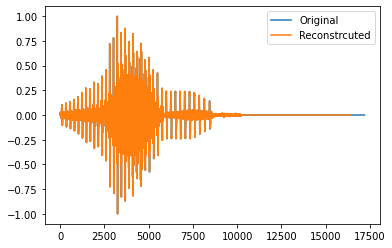

Reconstructed Audio:


In [ ]:
import matplotlib.pyplot as plt
#Testing with a training sample:
print("The test input:")
fs , audio = wav.read('espeakm1.wav') #;print("audio.shape=", audio.shape)
audio=audio/max(abs(audio)) #normalize it to its maximum
display(Audio(audio, rate=fs)); 
x=np.expand_dims(audio, axis=0) #append channels dim
x=np.expand_dims(x, axis=0) #append batch dim
X=torch.from_numpy(x) #convert it to torch type
X=X.type(torch.Tensor).to(device) #convert it to torch.Tensor, move to GPU if available
xrek=model(X)
xrek=xrek.detach()
xrek=np.array(xrek[0,0,:]) #remove dimensions
plt.plot(audio)
plt.plot(xrek)
plt.legend(('Original','Reconstrcuted'))
plt.show()
print("Reconstructed Audio:")
display(Audio(xrek, rate=fs)); 

* The stride makes it sensitive to time shifts in the input
* Next test: a shifted input.

The test input:


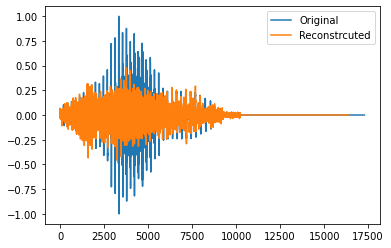

Reconstructed Audio:


In [ ]:
#Testing with a shifted training sample:
print("The test input:") 
fs , audio = wav.read('espeakm1.wav') #;print("audio.shape=", audio.shape)
audio=audio/max(abs(audio)) #normalize it to its maximum
audio=np.append(np.zeros(100),audio) #prepend zeros to test time or shift invariance
display(Audio(audio, rate=fs));
x=np.expand_dims(audio, axis=0) #append channels dim
x=np.expand_dims(x, axis=0) #append batch dim
X=torch.from_numpy(x) #convert it to torch type
X=X.type(torch.Tensor).to(device) #convert it to torch.Tensor, move to GPU if available
xrek=model(X)
xrek=xrek.detach()
xrek=np.array(xrek[0,0,:]) #remove dimensions
plt.plot(audio)
plt.plot(xrek)
plt.legend(('Original','Reconstrcuted'))
plt.show()
print("Reconstructed Audio:")
display(Audio(xrek, rate=fs)); 

* Observe: It sounds surprisingly different!
* This can be avoided by including **shifted samples into the training set**!
* This is also called **data augmentation**
* This also reduces over-fitting to the training set
* over-fitting is also a loophole which is exploited by "adverserial attacks" (see e.g.: https://en.wikipedia.org/wiki/Adversarial_machine_learning).
* Next example is a shift of the input signal by the stride.


The test input:


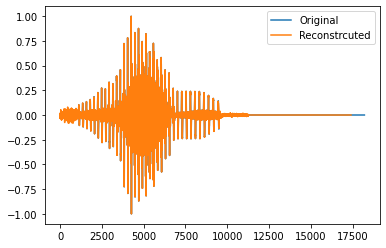

Reconstructed Audio:


In [ ]:
#Testing with a shifted training sample:
print("The test input:") 
fs , audio = wav.read('espeakm1.wav') #;print("audio.shape=", audio.shape)
audio=audio/max(abs(audio)) #normalize it to its maximum
audio=np.append(np.zeros(1024),audio) #prepend zeros to test time or shift invariance
display(Audio(audio, rate=fs));
x=np.expand_dims(audio, axis=0) #append channels dim
x=np.expand_dims(x, axis=0) #append batch dim
X=torch.from_numpy(x) #convert it to torch type
X=X.type(torch.Tensor).to(device) #convert it to torch.Tensor, move to GPU if available
xrek=model(X)
xrek=xrek.detach()
xrek=np.array(xrek[0,0,:]) #remove dimensions
plt.plot(audio)
plt.plot(xrek)
plt.legend(('Original','Reconstrcuted'))
plt.show()
print("Reconstructed Audio:")
display(Audio(xrek, rate=fs)); 

* Here it is back okay, only a short burst of noise in the beginning.
* This shows that only shifts smaller than the stride are needed for augmentation.


## The Denoising Autoencoder
* The denoising autoencoder is an autencoder that is trained with **noisy input** but a **clean target**
* It should learn the clean features of the signal in the lower dimensional latent space.

## The Variational Autoencoder (VAE)
* The Variational Autoencoder uses clean input and target signals, but a **noisy latentent space**.
* The noise in the latent space is added during training, controlled by an additional loss function for it.
* For that, the encoder produces outputs for the **mean** (our usual output), and the **standard variation** of the added noise.
* The loss function for the latent space is a function of mu (mean) and std (standard deviation), 
$$var. loss = -1/2 \cdot \sum^J_{j=1} (1 + \log(\sigma_i^2) - \mu_j^2 - \sigma_j^2 )$$
* where $j$ runs over the latent space.
* It is called the "variational loss"


* Also see: Kingma and Welling: "Auto-Encoding Variational Bayes", ICLR, 2014, https://arxiv.org/abs/1312.6114
* This is plotted in the following.

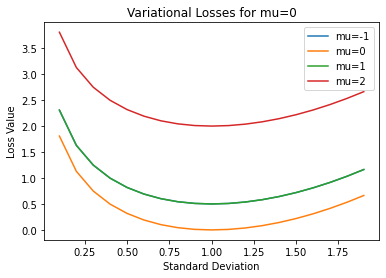

In [ ]:
def variational_loss(mu, std):
   #returns the variational loss from arguments mean and standard deviation (std)
   #see also: see Appendix B from VAE paper:
   #Kingma and Welling: "Auto-Encoding Variational Bayes", ICLR, 2014
   #https://arxiv.org/abs/1312.6114
   vl=-0.5*torch.mean(1+ 2*torch.log(std)-mu.pow(2) -(std.pow(2)))
   return vl

stdvec=np.arange(0,20)
for mu in range(-1,3):
  vloss=torch.zeros(stdvec.shape)
  for std in stdvec:
      vloss[std]=variational_loss(torch.tensor(mu),torch.tensor(0.1*std))
  plt.plot(stdvec*0.1,np.array(vloss))
plt.ylabel('Loss Value')
plt.xlabel('Standard Deviation')
plt.legend(('mu=-1', 'mu=0', 'mu=1', 'mu=2'))
plt.title('Variational Losses for mu=0')
plt.show()

* Observe: The minimum is obtained with mean $\mu=0$ and standard deviation $\sigma =1.0$, and only the magnitude of $\mu$ is relevant.
* Hence the optimizer will try to achieve a latent space with as **small magnitude** of $\mu$ as possible, and a **standard deviation** $\sigma$ as **close to 1.0** as possible.


### Similarity to Audio Coding
* The **latent space** can be seen as the ouput of the encoder **analysis filter bank**.
* The **mean** $\mu$ can be seen as its **subband values**,
* The **standard deviation** $\sigma$ can be seens as the **quantization error** resulting from quantizing the subband values before entropy coding.
* In **perceptual audio** coding the quantization stepsize and hence the value of $\sigma$ is **controlled by a psycho-acoustic model**.
* In **lossless audio** coding it is a **fixed quantizer**, hence with a fixed $\sigma$.



* **Smaller magnitudes** mean **fewer bits** for encoding
* Hence the VAE tries to **minimize the number of bits** or **information** to represent the latent space
* Same goal as in audio coding.

### Simplification
* fix $\sigma=1$.
* Which means we just need to add noise with unit standard deviation to the encoder output. 
* This leads to the simplified variational loss as
$$var. loss = 1/2 \cdot \sum^J_{j=1}  \mu_j^2  $$
* Which is basically just the power of the latent space.


* Hence our total loss is the sum of the reconstruction loss and the weighted variational loss,
* loss= reconstruction loss + variational loss with mu^2
* In the following we modify our convolutional autoencoder accoringly
* Now we need to use its "encoder" and "decoder" functions.
* First setting up the training set again.

In [ ]:
#Make training set: (can also be replaced by other recordings)
os.system('espeak -s 150 -ven-us+f5 "1" -w espeakf1.wav') #female speech
os.system('espeak -s 150 "1" -w espeakm1.wav') #male speech
os.system('espeak -s 150 -ven-us+f5 "2" -w espeakf2.wav')
os.system('espeak -s 150 "2" -w espeakm2.wav')
audioset=('espeakf1.wav','espeakm1.wav','espeakf2.wav','espeakm2.wav')
#At 16 bit/sample and 22050 Hz sampling rate.
print("len(audioset)=",len(audioset),". Size of batch")

audiolen=20000 #max number of audio signal samples
#Pre-processing before reconition:
x=np.zeros((len(audioset),1,audiolen))
batch=0
for audio in audioset:
  print("audio=", audio)
  fs , audio = wav.read(audio) #;print("audio.shape=", audio.shape)
  x[batch,0,:len(audio)]=audio/max(abs(audio)) #normalize it to its maximum
  batch +=1
print("x.shape", x.shape, ". Should be of shape (batch, channels, signal size)")
X=torch.from_numpy(x) #convert it to torch type
X=X.type(torch.Tensor).to(device) #convert it to torch.Tensor, move to GPU if available

len(audioset)= 4 . Size of batch
audio= espeakf1.wav
audio= espeakm1.wav
audio= espeakf2.wav
audio= espeakm2.wav
x.shape (4, 1, 20000) . Should be of shape (batch, channels, signal size)


### Training the modified Variational Autoencoder

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4) #select optimizer, here: adam
print("X.shape=", X.shape)
xrek=model(X)
print("xrek.shape", xrek.shape, "X.shape=", X.shape)
outputlen=len(xrek[0,0,:])
Y=X[:,:,:outputlen]
for epoch in range(2000):
    #latent space:
    Yencmean=model.encoder(X)
    xrek=model.decoder(Yencmean + torch.randn(Yencmean.shape)) #add noise in latent space with unit standard deviation
    loss=loss_fn(xrek, Y)+ 0.1* Yencmean.square().mean() #loss= reconstruction loss + variational loss with mu^2.
    if epoch%100==0:
        print(epoch, loss.item(), "rec.loss=", loss_fn(xrek, Y).item(), "var.loss=", 0.1* Yencmean.square().mean().item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

X.shape= torch.Size([4, 1, 20000])
xrek.shape torch.Size([4, 1, 19458]) X.shape= torch.Size([4, 1, 20000])
0 0.02317628264427185 rec.loss= 0.021494437009096146 var.loss= 0.001681845635175705
100 0.021071741357445717 rec.loss= 0.0200809296220541 var.loss= 0.0009908119216561317
200 0.02126344107091427 rec.loss= 0.020317157730460167 var.loss= 0.000946283619850874
300 0.02088242396712303 rec.loss= 0.01994379051029682 var.loss= 0.0009386325255036354
400 0.021340278908610344 rec.loss= 0.020379554480314255 var.loss= 0.0009607242420315743
500 0.020571885630488396 rec.loss= 0.01959916390478611 var.loss= 0.0009727214463055134
600 0.02109554223716259 rec.loss= 0.02010880596935749 var.loss= 0.0009867356158792973
700 0.021094437688589096 rec.loss= 0.020096564665436745 var.loss= 0.0009978730231523514
800 0.020654873922467232 rec.loss= 0.019646666944026947 var.loss= 0.00100820641964674
900 0.021279875189065933 rec.loss= 0.020236041396856308 var.loss= 0.0010438341647386552
1000 0.02019183151423931 rec

### Testing with a training sample

The test input:


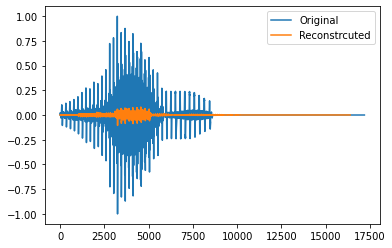

Reconstructed Audio:


In [ ]:
import matplotlib.pyplot as plt
#Testing with a training sample:
print("The test input:")
fs , audio = wav.read('espeakm1.wav') #;print("audio.shape=", audio.shape)
audio=audio/max(abs(audio)) #normalize it to its maximum
display(Audio(audio, rate=fs)); 
x=np.expand_dims(audio, axis=0) #append channels dim
x=np.expand_dims(x, axis=0) #append batch dim
X=torch.from_numpy(x) #convert it to torch type
X=X.type(torch.Tensor).to(device) #convert it to torch.Tensor, move to GPU if available
xrek=model(X)
xrek=xrek.detach()
xrek=np.array(xrek[0,0,:]) #remove dimensions
plt.plot(audio)
plt.plot(xrek)
plt.legend(('Original','Reconstrcuted'))
plt.show()
print("Reconstructed Audio:")
display(Audio(xrek, rate=fs)); 

### Testing decoder with only noise in latent space:


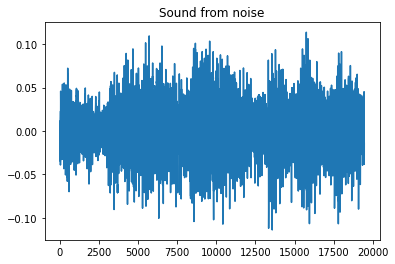

Reconstructed Audio:


In [ ]:
xrek=model.decoder(torch.randn(Yencmean.shape)) #just noise in latent space with unit standard deviation
xrek=xrek.detach()
xrek=np.array(xrek[0,0,:]) #remove dimensions
plt.plot(xrek)
plt.title('Sound from noise')
plt.show()
print("Reconstructed Audio:")
display(Audio(xrek, rate=fs)); 

* Oberserve: It sounds like male and female speech babble, even though we put just noise into the latent space!
* Different noises will sound differently.

# Recurrent Neural Networks (RNN)
* Recurrent neural networks have a feedback loop
* Part of their outputs become inputs for the next time step
* This is similar to Infinite Impulse Response (IIR) filters, which also have a feedback loop.
 

### An IIR Filter
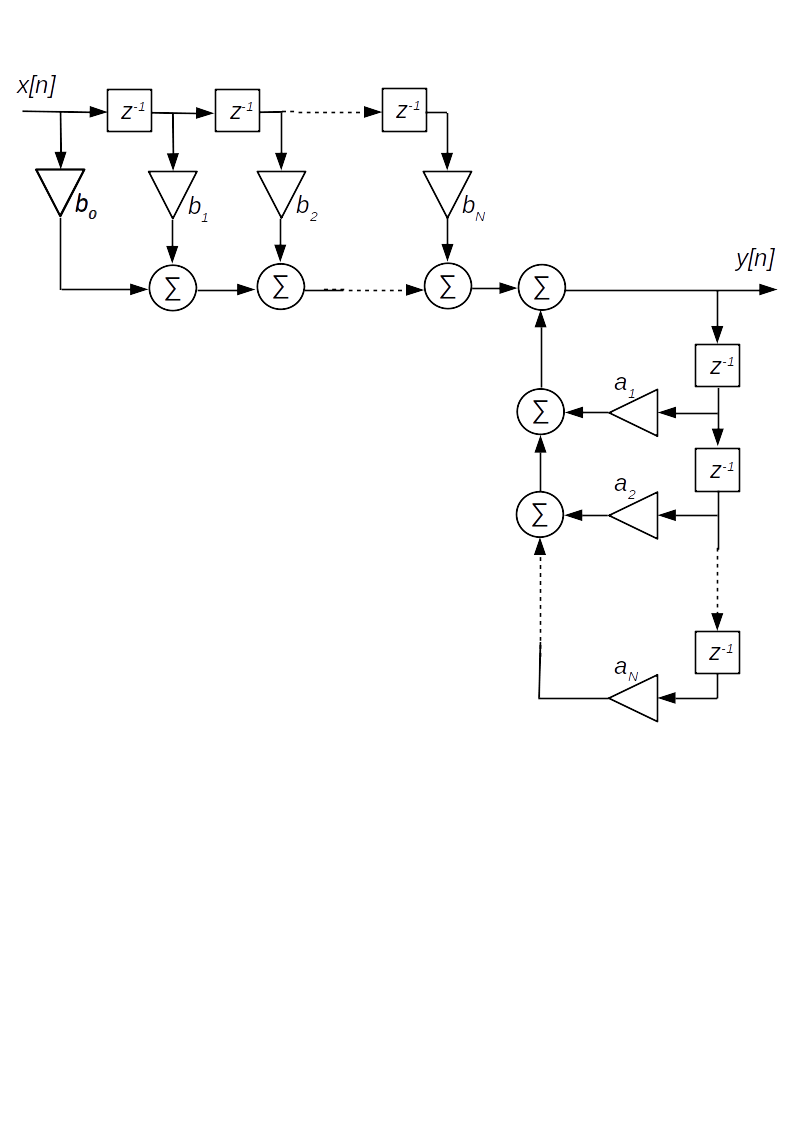

## IIR Filter Difference Equation
$$y[n]= \sum_{m=0}^L b_m \cdot x[n-m]+ \sum_{r=1}^R a_r \cdot y[n-r]$$
* with $x[n]$ input at time $n$
* $y[n]$ output at time $n$ and input for the previous time steps (feedback)

## RNN Equation
$$h_t = \tanh( W_{ih} x_t +b_{ih} + W_{hh} h_{t − 1} + b_{hh} )$$
* with $x_t$: input at time $t$
* $h_t$: "hidden state" and output at time t 
* $b_{ih}$, $b_{hh}$ bias from input and hidden state
* $W_{ih}$, $W_{hh}$: weight matrices from input to hidden state and between hidden states at consecutive times.
* Observe: The hidden state is input and output (feedback). 
* from: https://pytorch.org/docs/stable/nn.html?highlight=rnn#torch.nn.RNN


## Comparing IIR vs. RNN
* The RNN has a non-linearity, the "tanh", 
* which acts like a soft limiter and can be neglected for small signals.
* It has multi-dimensional inputs and outputs.
* Hence it can be seen as a generalization of IIR filters.

## Damped Oscillator
* An IIR filter can be used to implement a damped oscillator of 2nd order
* Its impulse response is a decaying sinusoid, in principle of infinite length
* This simulates for instance the sound of a plucked string or a bell.
* The quality factor "Q" determines the amount of damping, or how long the impulse response extends. The closer to 1 the longer. 

frequency=  523.2511306011972
k1, k2= 1.8243077140857287 -0.990025


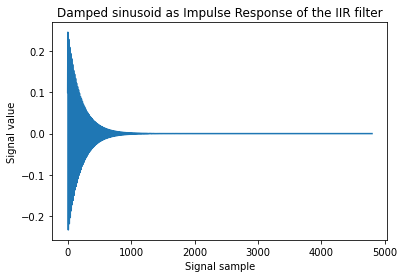

In [ ]:
from IPython.display import Audio
import scipy.io.wavfile as wav
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

Fs=8000 #sampling rate of the audio signal
seq_len=int(Fs*0.6) #0.6 second sound (=4800 samples)
#------------------------------------------------------------------------
#IIR Filter coefficients:
note=0 #12 notes in an octave, starting with 0
omega=2*np.pi*440.0 * 2**(3/12.0) * 2**((note)/12.0) /Fs;
print("frequency= ", omega*Fs/(2*np.pi))
#Q is the quality factor (1 decays forever)
Q=0.995 #determins speed of decay, the closer to 1 the longer
#For 0.995 Adam is just converging.
#k1 and k1 are the resulting denominator coefficients.
# Also see: https://dspfirst.gatech.edu/chapters/08feedbac/demos/recur/index.html
k1=2*Q*np.cos(omega)
k2=-pow(Q,2);
print("k1, k2=", k1,k2)

# The IIR filtering:
ximp=np.zeros(seq_len)
ximp[0]=0.1 #impulse at the beginning
filtered=scipy.signal.lfilter([1], np.array([1, -k1,-k2]), ximp)
display(Audio(filtered, rate=Fs));
plt.plot(filtered)
plt.xlabel('Signal sample')
plt.ylabel('Signal value')
plt.title('Damped sinusoid as Impulse Response of the IIR filter')
plt.show()

## An RNN as IIR Filter
* Since the RNN can be seen as generalization of IIR filters, we should be able to generate the same sound using an RNN.
* For our IIR filter of second order we had the feedback coefficient array "np.array([1, -k1,-k2])" of length 3
* Hence we choose the size of the hidden state also as 3.



* The IIR filter gets 1 signal sample at a time, and outputs 1 signal sample at a time
* Hence we also choose the size of the "input_size" or the RNN as 1.
* Since the hidden state of size 3 is also the output, we need a linear layer to reduce the size to 1. 
* Since it is only 1 filter in a row, we choose "num_layers" to 1.

In [ ]:
import torch
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device='cpu'
print("device=", device) 

batch=1 #number of audio signals for training
infeatures= 1 # samples per input time step
hiddensize= 3 #number of hidden states, the memory elements
outputs=1 #1 samples per output time step
numlayers=1 #number of layers of the network

class RNNnet(nn.Module):
    def __init__(self, infeatures=1, hiddensize=3, outputs=1):
      super(RNNnet, self).__init__()
      # Define the model. 
      self.rnn = nn.RNN(input_size=infeatures, hidden_size=hiddensize, num_layers=numlayers, bias=False)
      #forward layer for output
      self.fo = nn.Linear(hiddensize, outputs, bias=False)

    def forward(self, x):
      h_0 = torch.zeros(numlayers, batch, hiddensize).to(device)
      outrnn, hn = self.rnn(x, h_0)
      #Linear layer to obtain the output:
      out = self.fo(outrnn) #e.g. used to just keep first output
      return out

device= cpu


### RNN Input Format
* The RNN expects an input of format (siglen,batch,features)
* It also prodices such output.
* The "features" could for instance be different channels.
* For convenience we define a conversion function from a mono audio signal to the RNN input.

In [ ]:
def signal2pytorch(x):
   #Function to convert a signal vector x, like a mono audio signal, into a 3-d Tensor that Pytorch expects,
   #https://pytorch.org/docs/stable/nn.html
   #Argument x: a 1-d signal as numpy array
   #output: 3-d Pytorch Tensor.
   #for RNN Input: (siglen,batch,features)
   X = np.expand_dims(x, axis=-1)  #add batch  dimension right (here only 1 )
   X = np.expand_dims(X, axis=-1)  #add features dimension right (here only 1 )
   X=torch.from_numpy(X)
   X=X.type(torch.Tensor)
   return X

### Training the RNN as Damped Oscillator
* Now we can train our RNN to behave like our IIR filter
* With an impulse as input, we give it the IIR impulse response as training target


In [ ]:
import time
inputsig=signal2pytorch(ximp) #ximp impulse sequence from above
target= signal2pytorch(filtered) #"filtered" is the IIR impulse response
rnn = RNNnet(infeatures, hiddensize, outputs).to(device) #instanciate our RNN
loss_fn = nn.MSELoss(reduction='sum') #define the loss function
optimizer = torch.optim.Adam(rnn.parameters(), lr=1e-3)
print("Start optimization")
starttime=time.time()
for epoch in range(501):
  Ypred=rnn(inputsig)
  loss=loss_fn(Ypred, target)
  if epoch%50==0:
    print(epoch, loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
endtime=time.time()
print("Duration of optimization:", endtime-starttime)

Start optimization
0 3.155696392059326
50 3.150683641433716
100 3.145624876022339
150 3.13869571685791
200 3.1255991458892822
250 3.0894010066986084
300 3.0161068439483643
350 2.848999261856079
400 0.38605740666389465
450 0.0913543626666069
500 0.04940241202712059
Duration of optimization: 127.46154189109802


### Testing on the Training Signal

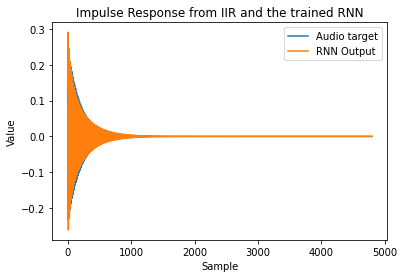

IIR Impulse Response:


RNN Impulse Response:


In [ ]:
outsig= rnn(inputsig)
outsig=outsig.detach()
outsig=np.array(outsig) #turn into numpy array
outsig=outsig[:,0,0]

plt.plot(filtered)
plt.plot(outsig)
plt.legend(('Audio target','RNN Output'))
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title("Impulse Response from IIR and the trained RNN")
plt.show()
print("IIR Impulse Response:")
display(Audio(filtered, rate=Fs));
print("RNN Impulse Response:")
display(Audio(outsig, rate=Fs));

* Observe: The Result might not be very close to the desired target
* This shows a problem of Recurrent Neural Networks: the "vanishing gradient"
* The optimizer computes gradents, and for that needs to follow the loops
* If the signal in the loop is only slowly decaying, as here, numerical errors accumulate.
* This may lead to the optimizer getting "stuck"


* Playing with the learning rate "lr" helps to a degree.
* Extending the impulse response even further by increasing the quality factor Q of the IIR filter above about 0.995, closer to 1, makes this problem even more pronounced.

## Summary and Conclusions
* We saw the connection between audio signal processing and Deep Learning
* Saw how to create simple test sets
* How to setup neural networks for audio signal processing
* and how to conduct simple experiments, that should inspire own experiments.

## Summary and Conclusions

* developing data-driven techniques requires interdisciplinary background
* audio signals $\rightarrow$ profound knowledge in audio signals and processing
* follow established procedures